In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys
import dna_features_viewer

notebook_path = os.getcwd()

if 'tests' in notebook_path:
    project_path = os.path.abspath(os.path.join(notebook_path, '..'))
else:
    project_path = notebook_path
if project_path not in sys.path:
    sys.path.append(project_path)

from src.single_stranded_nucleic_acids import SingleStrandNucleicAcidSequence
from src.double_stranded_nucleic_acids import DoubleStrandNucleicAcidSequence
from src.nucleic_acid_reactions import NucleicAcidReaction

: 

In [2]:
from dna_features_viewer import GraphicFeature, GraphicRecord


ssDNA = SingleStrandNucleicAcidSequence(sequence="ATGCGTGCCGGAATGTCGTTTGCGTA", nucleic_acid_type="DNA", circular=False, strand_direction="forward")

ssDNA.add_annotations([
    {"name": "Tamara Gene", "start": 0, "end": 7, "note": "What makes tamara special"},
    {"name": "barcode", "start": 8, "end": 10, "note": "tiny barcode"},
    {"name": "ADHD gene", "start": 11, "end": 20}
])

# ssDNA.set_circular()
# ssDNA.view()

ssDNA

SingleStrandNucleicAcidSequence(id='45db20753a7047b7bd59fcacea5704fb', is_part_of_dsDNA='False', sequence='ATGCGTGCCGGAATGTCGTTTGCGTA', nucleic_acid_type='DNA', circular=False, strand_direction='forward', annotations={'Tamara Gene': SequenceAnnotation(name='Tamara Gene', start=0, end=7, note='What makes tamara special'), 'barcode': SequenceAnnotation(name='barcode', start=8, end=10, note='tiny barcode'), 'ADHD gene': SequenceAnnotation(name='ADHD gene', start=11, end=20, note='')}, base_modifications={}, note='')

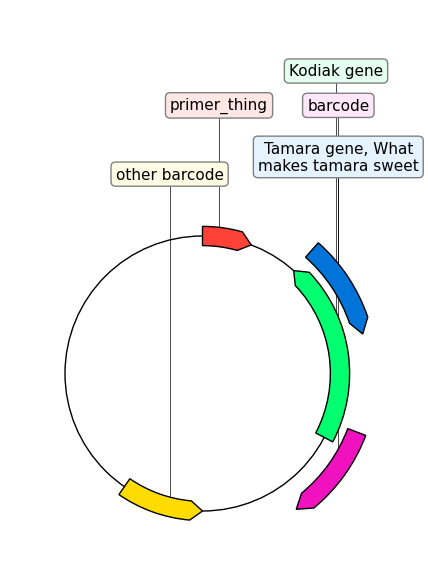

In [12]:
template_seq = DoubleStrandNucleicAcidSequence(
    forward_sequence="TAGTAGCCCCCGGGGGAAAAATTTTTAAAAAAAAAA",
)
template_seq.forward_sequence.add_annotations([
    {"name": "Tamara gene", "start": 0, "end": 5, "note": "What makes tamara sweet"},
    {"name": "barcode", "start": 10, "end": 15},]
)
template_seq.reverse_sequence.add_annotations([
    {"name": "Kodiak gene", "start": 0, "end": 11},
    {"name": "other barcode", "start": 20, "end": 25},]
)

fwd_primer = SingleStrandNucleicAcidSequence(
    sequence="CGCGCGTAGTAG",
    annotations=[
        {"name": "primer_thing", "start": 0, "end": 3}
    ]
)
rev_primer = SingleStrandNucleicAcidSequence(
    sequence="TTTTTTTTTTTTTTTTTTTT",
)

pcr_reaction = NucleicAcidReaction(
    reaction_type="pcr",
    keep_primer_annotations=True,
    inputs={
        "template": template_seq,
        "forward_primer": fwd_primer,
        "reverse_primer": rev_primer}
)

pcr_reaction.outputs["pcr_construct"].set_circular()
pcr_reaction.outputs["pcr_construct"].view()


In [15]:
len(pcr_reaction.outputs["pcr_construct"].forward_sequence.sequence)

52

    # def view(self):
    #     features = []
    #     for annotation in self.forward_sequence.annotations.values():
    #         label=annotation.name
    #         if annotation.note:
    #             label=f"{annotation.name}, {annotation.note}"
    #         features.append(GraphicFeature(
    #             label=label,
    #             start=annotation.start,
    #             end=annotation.end,
    #             strand=+1,
    #             color=Colors.random_color(),
    #         ))
    #     for annotation in self.reverse_sequence.annotations.values():
    #         label=annotation.name
    #         if annotation.note:
    #             label=f"{annotation.name}, {annotation.note}"
    #         features.append(GraphicFeature(
    #             label=label,
    #             start=annotation.start,
    #             end=annotation.end,
    #             strand=-1,
    #             color=Colors.random_color(),
    #         ))
    #     seq_length = len(self.forward_sequence.sequence)
    #     if seq_length < len(self.reverse_sequence.sequence):
    #         seq_length = len(self.reverse_sequence.sequence)
    #     if self.circular:
    #         record = CircularGraphicRecord(sequence_length=seq_length, features=features)
    #     else:
    #         record = GraphicRecord(sequence_length=seq_length, features=features)
    #     record.plot(figure_width=5)
